In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import yfinance as yf  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[*********************100%***********************]  1 of 1 completed


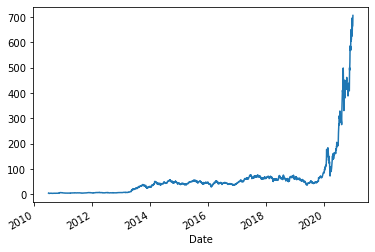

In [54]:
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
data = yf.download('SPY','2010-01-01','2021-01-01')
# Plot the close prices
data["Adj Close"].plot()
plt.show()

In [55]:
X = np.array([data.index, data['Adj Close'], data['Low']]).T

In [56]:
# Regular Scenario:
monthly_injection = 0 # doesn't seem to be a big factor
numBusinessDays = 20 # doesn't seem to be a big factor
original = 80000
total_original = original
cash_percent = 0.7 # seems to be a big factor
cash = cash_percent * total_original
spy = (1 - cash_percent) * total_original
num_spy_stocks = 0

for i in range(0, len(X) - numBusinessDays, numBusinessDays):
    if i == 0:
        num_spy_stocks = spy / X[i,1]
    else:
        spy = num_spy_stocks * X[i,1]
        original = original + monthly_injection
        total_original = cash + spy + monthly_injection
        new_cash = cash_percent * total_original
        difference = cash + monthly_injection - new_cash
        spy = spy + difference
        cash = new_cash
        if difference > 0:
            # Buy Stock because SPY went down
            num_spy_stocks = num_spy_stocks + difference / X[i,1]
            cash_percent = cash_percent - 0.05 if cash_percent > 0.25 else 0.25 # Mechanism to modify cash %
        else:
            # Sell stock because SPY went up
            num_spy_stocks = num_spy_stocks + difference / X[i,1]
            cash_percent = cash_percent + 0.05 if cash_percent < 0.75 else 0.75 # Mechanism to modify cash %


# Ending
spy = num_spy_stocks * X[len(X)-1, 1]
total_original = cash + spy

print(total_original / original)

8.482231554308877


In [57]:
# Buy Hold
first_price = X[0,1]
last_price = X[len(X)-1, 1]
print(last_price / first_price)

147.69150291730938
